# Tutorial 1 : using the `qmat.lagrange` module

📜 _The_ `LagrangeApproximation` _class from the_ `qmat.lagrange` _module is a multi-purpose class to perform interpolation, integration or derivative approximation from a given set of 1D points._
_It is based on the Barycentric Lagrange interpolation theory, originally developed by Joseph-Louis Lagrange around 1795, and widely popularized by the paper of Jean-Paul Berrut ahd Llyod N. Trefethen : ["Barycentric Lagrange interpolation"](https://doi.org/10.1137/S0036144502417715])._

The main concept behind the `LagrangeApproximation` class is to precompute the barycentric weights for any provided set of points, then use them to generate value-independent matrices used later to compute approximations (interpolation, integration or derivation) from values vectors.

## Basic usage

Whatever the application, one needs a set of $M$ interpolation points ${\bf t}$ to instantiate a `LagrangeApproximation` object :

In [1]:
from qmat.lagrange import LagrangeApproximation

points = [0, 0.25, 0.5, 0.75, 1]
approx = LagrangeApproximation(points)

print(f"points  : {approx.points} (size: {approx.nPoints})")
print(f"weights : {approx.weights}")

points  : [0.   0.25 0.5  0.75 1.  ] (size: 5)
weights : [ 10.66666667 -42.66666667  64.         -42.66666667  10.66666667]


When initializing the `approx` variable, weights are already pre-computed and stored as attribute, along with the given points. 

> 💡 There is no constrains on the lower and upper bound for the points, but they **have to be sorted in ascending order** (if not, an error is raised).

### Interpolation

Let's interpolate a function on $S$ "fine" points ${\bf s}$, knowing "coarse" function values ${\bf f_t}$ on the interpolated points.
We can generate the $P$ matrix of shape $(S,M)$ that allows to interpolate the function values on the $S$ fine points :

$$
{\bf f_s} = P {\bf f_t},
$$

simply like this :

In [2]:
import numpy as np

finePoints = np.linspace(0, 1, num=200)
P = approx.getInterpolationMatrix(finePoints)

Then, $P$ can be stored and use for multiple interpolation on the same points :

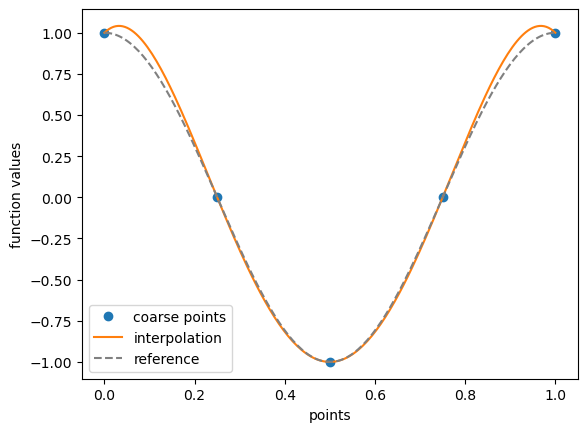

In [ ]:
fValues = np.cos(2*np.pi*approx.points)
interpolated = P @ fValues
reference = np.cos(2*np.pi*finePoints)

# Some plotting for demonstration
import matplotlib.pyplot as plt
plt.plot(points, fValues, "o", label="coarse points")
plt.plot(finePoints, interpolated, label="interpolation")
plt.plot(finePoints, reference, "--", color="gray", label="reference")
plt.xlabel("points"); plt.ylabel("function values"); plt.legend()

> 💡 Note that there is a visible error with the reference close to the boundary (Runge effect), which is due to the choice of interpolated points. 
> Those can be selected differently to improve the quality of the interpolation, see the [tutorial on node generation ...](./22_nodes.ipynb).

### Integration

🛠️ In construction ...

### Derivation

🛠️ In construction ...